# Import Data and Libraries 

In [294]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [295]:
quandl.ApiConfig.api_key ="PDvy6a-Ay5gmtgyQwyLV"

In [296]:
data = quandl.get("CFTC/13874U_FO_L_OLD_CR")  # Retrieve S&P500 

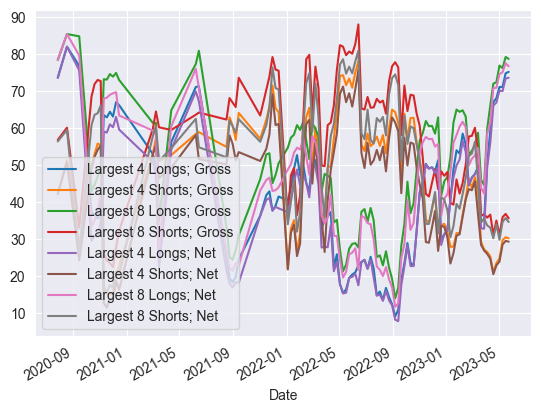

In [297]:
data.plot() 
plt.show()

In [298]:
Consumer_Staples = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Data/Consumer_Staples_JC.csv")

In [299]:
Consumer_Staples.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",760.46,762.27,754.13,756.55,756.55,"164,164,200"
1,1,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000"
2,2,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800"
3,3,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700"
4,4,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500"


In [300]:
Energy = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Data/Energy_JC.csv")

In [301]:
Energy.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",602.51,602.51,590.07,596.86,596.86,"153,156,800"
1,1,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500"
2,2,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500"
3,3,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400"
4,4,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800"


In [302]:
Communication_Services = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Data/Communication_Services_JC.csv")

In [303]:
Communication_Services.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",210.92,212.64,209.39,210.77,210.77,"290,422,500"
1,1,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400"
2,2,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700"
3,3,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100"
4,4,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700"


In [304]:
Industrials = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Data/Industrials_JC.csv")

In [305]:
Industrials.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",831.07,832.83,824.67,828.48,828.48,"156,913,400"
1,1,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000"
2,2,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900"
3,3,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800"
4,4,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300"


# Analyze Data 

In [306]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100) 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [307]:
Industrials.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",831.07,832.83,824.67,828.48,828.48,"156,913,400"
1,1,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000"
2,2,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900"
3,3,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800"
4,4,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300"


In [308]:
Communication_Services.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",210.92,212.64,209.39,210.77,210.77,"290,422,500"
1,1,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400"
2,2,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700"
3,3,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100"
4,4,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700"


In [309]:
Energy.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",602.51,602.51,590.07,596.86,596.86,"153,156,800"
1,1,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500"
2,2,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500"
3,3,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400"
4,4,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800"


In [310]:
Consumer_Staples.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",760.46,762.27,754.13,756.55,756.55,"164,164,200"
1,1,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000"
2,2,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800"
3,3,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700"
4,4,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500"


In [311]:
Industrials_DV = 'Close*'

In [312]:
DV1 = Industrials[Industrials_DV]

In [313]:
DV1.head()

0    828.48
1    830.39
2    824.03
3    821.53
4    832.07
Name: Close*, dtype: object

In [314]:
Industrials_IV = ['Volume', 'Open', 'High', 'Low']

In [315]:
IV1 = Industrials[Industrials_IV]

In [316]:
IV1.head()

,Volume,Open,High,Low
0,"156,913,400",831.07,832.83,824.67
1,"153,779,000",826.17,833.27,825.80
2,"193,548,900",821.42,826.06,817.01
3,"174,945,800",829.92,829.93,820.46
4,"180,217,300",838.55,840.97,830.95


In [317]:
Communication_Services_DV = 'Close*'

In [318]:
DV2 = Communication_Services[Communication_Services_DV]

In [319]:
DV2.head()

0    210.77
1    210.92
2    207.37
3    206.48
4    207.73
Name: Close*, dtype: object

In [320]:
Communication_Services_IV = ['Volume', 'Open', 'High', 'Low']

In [321]:
IV2 = Communication_Services[Communication_Services_IV]

In [322]:
IV2.head()

,Volume,Open,High,Low
0,"290,422,500",210.92,212.64,209.39
1,"307,898,400",207.37,211.14,206.53
2,"399,977,700",206.48,209.82,206.39
3,"253,331,100",207.14,207.45,205.20
4,"272,091,700",210.85,210.90,207.73


In [323]:
Energy_DV = 'Close*'

In [324]:
DV3 = Energy[Energy_DV]

In [325]:
DV3.head()

0    596.86
1    602.51
2    604.77
3    616.43
4    613.23
Name: Close*, dtype: float64

In [326]:
Energy_IV = ['Volume', 'Open', 'High', 'Low']

In [327]:
IV3 = Energy[Energy_IV]

In [328]:
IV3.head()

,Volume,Open,High,Low
0,"153,156,800",602.51,602.51,590.07
1,"138,167,500",604.77,610.46,599.85
2,"162,236,500",616.43,616.43,599.83
3,"137,879,400",613.23,621.22,611.35
4,"139,637,800",606.94,620.61,606.94


In [329]:
Consumer_Staples_DV = 'Close*'

In [330]:
DV4 = Consumer_Staples[Consumer_Staples_DV]

In [331]:
DV4.head()

0    756.55
1    764.84
2    762.16
3    768.05
4    773.06
Name: Close*, dtype: object

In [332]:
Consumer_Staples_IV = ['Volume', 'Open', 'High', 'Low']

In [333]:
IV4 = Consumer_Staples[Consumer_Staples_IV]

In [334]:
IV4.head()

,Volume,Open,High,Low
0,"164,164,200",760.46,762.27,754.13
1,"147,625,000",761.29,765.94,758.95
2,"165,712,800",762.06,764.78,756.94
3,"128,804,700",773.43,773.68,767.33
4,"137,650,500",776.58,776.58,771.93


In [335]:
Energy.shape

(1258, 8)

In [336]:
Industrials.shape

(1258, 8)

In [337]:
Consumer_Staples.shape

(1258, 8)

In [338]:
Communication_Services.shape

(1258, 8)

In [339]:
Energy.dtypes

Unnamed: 0       int64
Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume          object
dtype: object

In [340]:
Industrials.dtypes

Unnamed: 0      int64
Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

In [341]:
Consumer_Staples.dtypes

Unnamed: 0      int64
Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

In [342]:
Communication_Services.dtypes

Unnamed: 0      int64
Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

In [343]:
Industrials.head()
Industrials.tail()
Industrials.sample(5)

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
418,418,"Sep 29, 2021",847.30,848.99,843.76,844.69,844.69,"165,780,400"
1025,1025,"May 03, 2019",653.95,660.71,653.95,660.25,660.25,-
286,286,"Apr 07, 2022",841.90,849.95,833.76,846.93,846.93,"233,107,900"
23,23,"Apr 26, 2023",831.84,834.42,820.49,822.05,822.05,"223,331,500"
582,582,"Feb 04, 2021",742.90,749.08,741.69,748.06,748.06,"269,214,500"


In [344]:
Energy.head()
Energy.tail()
Energy.sample(5)

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
512,512,"May 17, 2021",401.29,410.66,399.30,410.53,410.53,"201,228,100"
853,853,"Jan 08, 2020",461.39,461.39,452.84,453.36,453.36,"185,514,800"
488,488,"Jun 21, 2021",391.92,409.40,391.92,408.73,408.73,"183,196,400"
584,584,"Feb 02, 2021",298.59,309.00,298.59,301.85,301.85,"216,189,700"
884,884,"Nov 21, 2019",433.44,440.21,432.59,439.68,439.68,"160,224,000"


In [345]:
Consumer_Staples.head()
Consumer_Staples.tail()
Consumer_Staples.sample(5)

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
191,191,"Aug 24, 2022",787.05,790.00,785.20,788.21,788.21,"84,222,900"
627,627,"Nov 30, 2020",685.56,686.92,679.42,686.37,686.37,"224,710,100"
153,153,"Oct 18, 2022",719.43,725.24,716.35,720.21,720.21,"119,986,000"
485,485,"Jun 24, 2021",710.57,714.62,710.10,713.52,713.52,"93,064,000"
1132,1132,"Nov 27, 2018",560.32,566.10,559.76,565.79,565.79,-


In [346]:
Communication_Services.head()
Communication_Services.tail()
Communication_Services.sample(5)

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1111,1111,"Dec 28, 2018",138.65,140.48,137.66,138.39,138.39,-
1149,1149,"Nov 01, 2018",150.88,151.65,149.57,151.09,151.09,-
680,680,"Sep 15, 2020",198.02,202.34,198.02,201.42,201.42,"155,619,700"
1057,1057,"Mar 19, 2019",157.29,158.42,156.70,157.25,157.25,-
1017,1017,"May 15, 2019",160.58,164.52,160.04,163.97,163.97,-


In [347]:
Industrials1=Industrials.drop(["Unnamed: 0"],axis=1)

In [348]:
Industrials1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 30, 2023",831.07,832.83,824.67,828.48,828.48,"156,913,400"
1,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000"
2,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900"
3,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800"
4,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300"
...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",631.43,636.59,630.07,636.59,636.59,-
1254,"Jun 05, 2018",630.22,631.77,627.92,630.93,630.93,-
1255,"Jun 04, 2018",631.86,635.66,629.01,629.84,629.84,-
1256,"Jun 01, 2018",626.20,631.84,626.20,630.67,630.67,-


In [349]:
Industrials1['Date1'] = pd.to_datetime(Industrials1.Date)

In [350]:
Industrials1

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,"May 30, 2023",831.07,832.83,824.67,828.48,828.48,"156,913,400",2023-05-30
1,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000",2023-05-26
2,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900",2023-05-25
3,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800",2023-05-24
4,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300",2023-05-23
...,...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",631.43,636.59,630.07,636.59,636.59,-,2018-06-06
1254,"Jun 05, 2018",630.22,631.77,627.92,630.93,630.93,-,2018-06-05
1255,"Jun 04, 2018",631.86,635.66,629.01,629.84,629.84,-,2018-06-04
1256,"Jun 01, 2018",626.20,631.84,626.20,630.67,630.67,-,2018-06-01


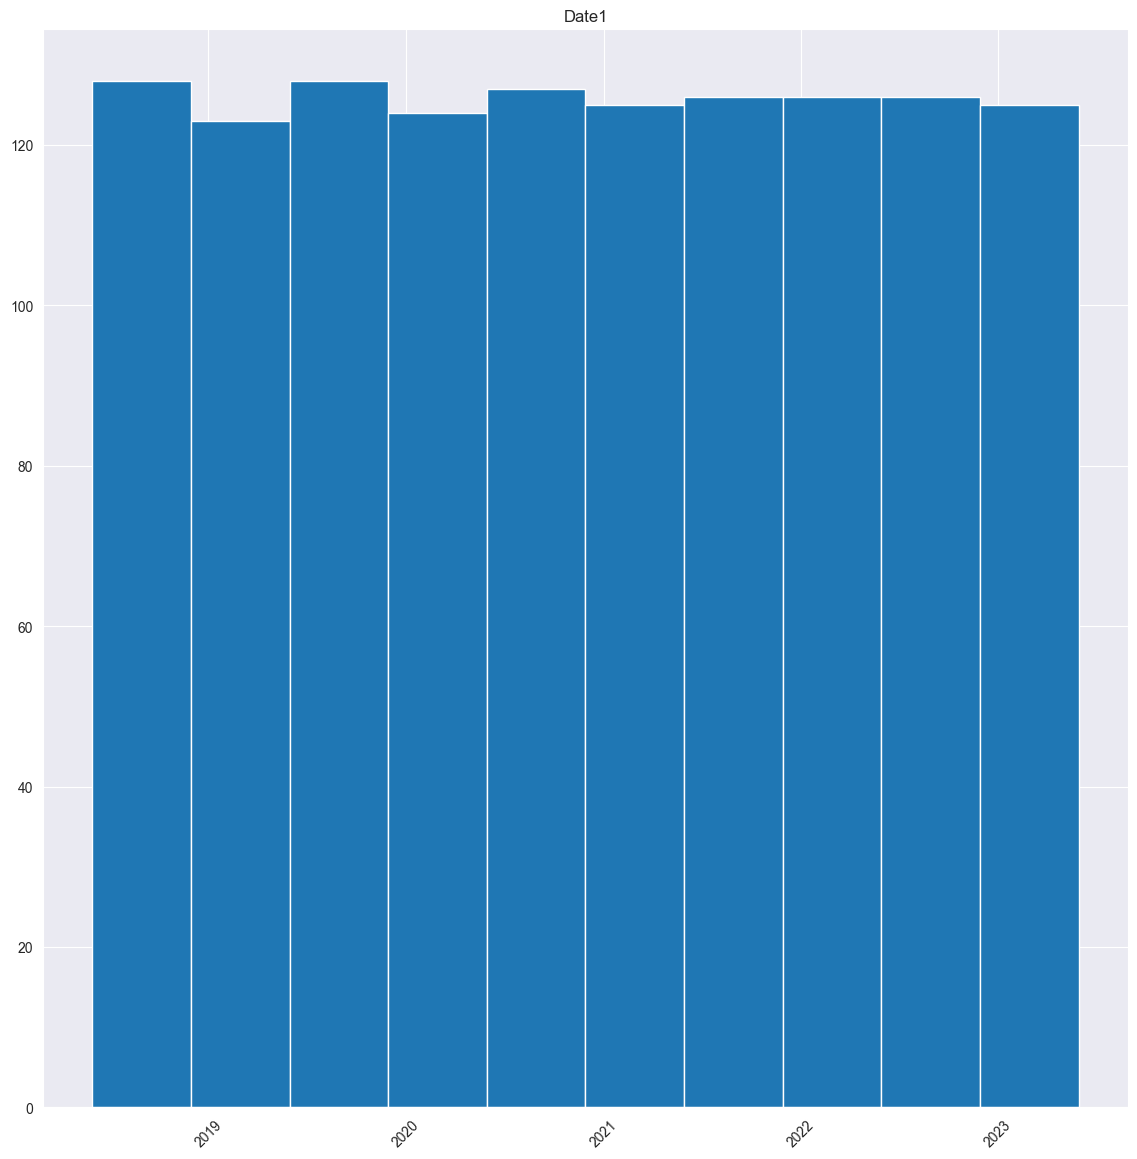

In [391]:
Industrials1.hist(figsize=(14,14), xrot=45)
plt.show()

In [352]:
Energy1=Energy.drop(["Unnamed: 0"],axis=1)

In [353]:
Energy1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 30, 2023",602.51,602.51,590.07,596.86,596.86,"153,156,800"
1,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500"
2,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500"
3,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400"
4,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800"
...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",554.30,558.77,552.54,557.43,557.43,-
1254,"Jun 05, 2018",556.21,558.96,552.34,554.30,554.30,-
1255,"Jun 04, 2018",561.37,567.25,554.92,556.21,556.21,-
1256,"Jun 01, 2018",558.35,564.92,558.26,561.37,561.37,-


In [354]:
Energy1['Date1'] = pd.to_datetime(Energy.Date)

In [355]:
Energy1

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,"May 30, 2023",602.51,602.51,590.07,596.86,596.86,"153,156,800",2023-05-30
1,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500",2023-05-26
2,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500",2023-05-25
3,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400",2023-05-24
4,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800",2023-05-23
...,...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",554.30,558.77,552.54,557.43,557.43,-,2018-06-06
1254,"Jun 05, 2018",556.21,558.96,552.34,554.30,554.30,-,2018-06-05
1255,"Jun 04, 2018",561.37,567.25,554.92,556.21,556.21,-,2018-06-04
1256,"Jun 01, 2018",558.35,564.92,558.26,561.37,561.37,-,2018-06-01


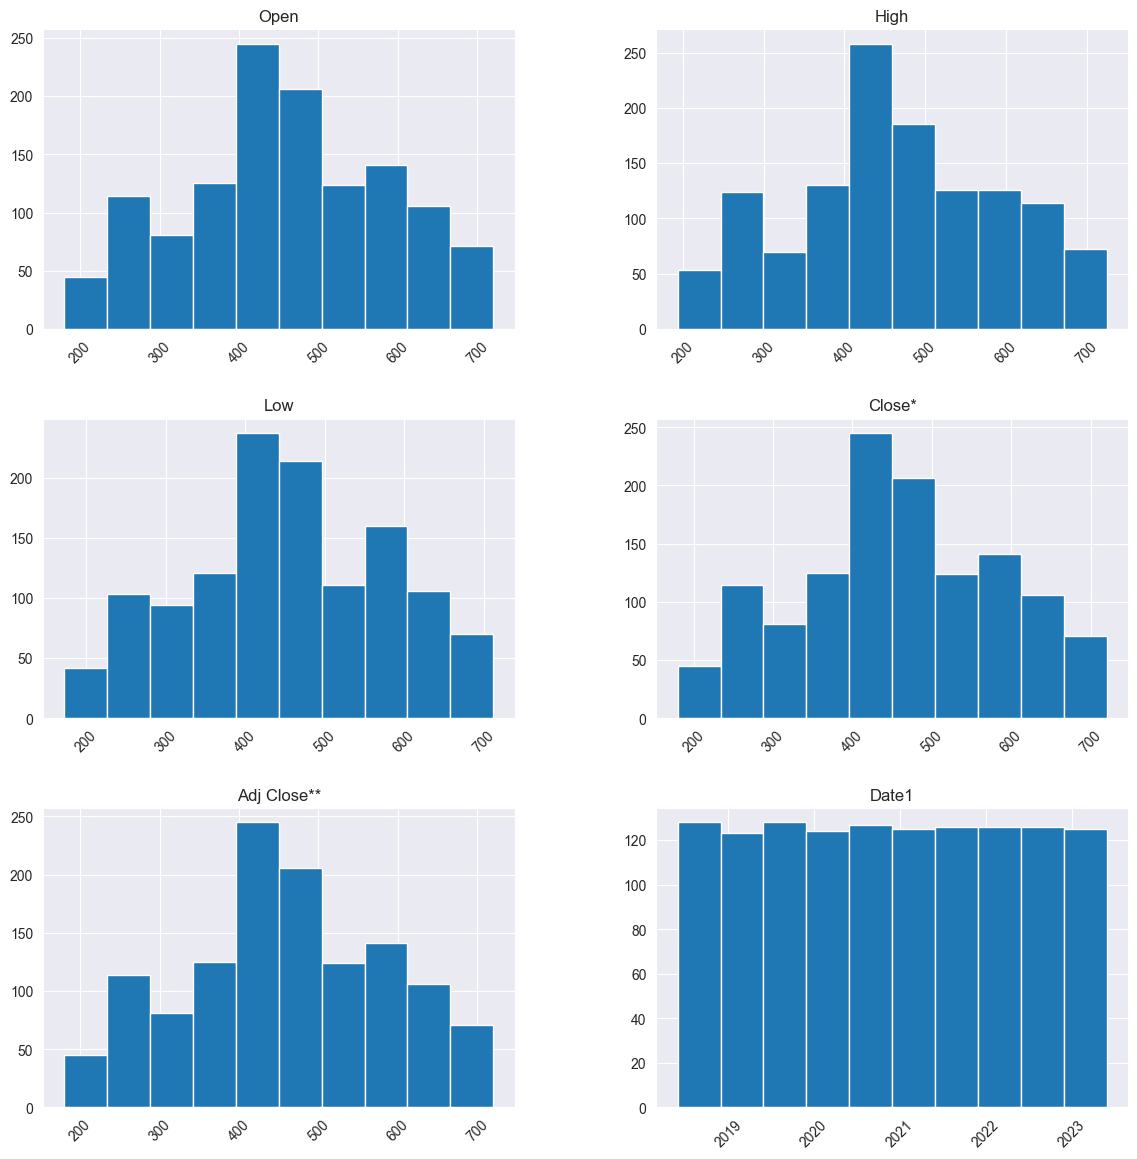

In [356]:
Energy1.hist(figsize=(14,14), xrot=45)
plt.show()

In [357]:
Consumer_Staples1=Consumer_Staples.drop(["Unnamed: 0"],axis=1)

In [358]:
Consumer_Staples1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 30, 2023",760.46,762.27,754.13,756.55,756.55,"164,164,200"
1,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000"
2,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800"
3,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700"
4,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500"
...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",510.07,510.33,506.94,510.31,510.31,-
1254,"Jun 05, 2018",512.34,512.57,508.12,509.59,509.59,-
1255,"Jun 04, 2018",509.50,512.63,509.16,512.06,512.06,-
1256,"Jun 01, 2018",508.82,510.14,506.57,507.88,507.88,-


In [359]:
Consumer_Staples1['Date1'] = pd.to_datetime(Consumer_Staples1.Date)

In [360]:
Consumer_Staples1

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,"May 30, 2023",760.46,762.27,754.13,756.55,756.55,"164,164,200",2023-05-30
1,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000",2023-05-26
2,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800",2023-05-25
3,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700",2023-05-24
4,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500",2023-05-23
...,...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",510.07,510.33,506.94,510.31,510.31,-,2018-06-06
1254,"Jun 05, 2018",512.34,512.57,508.12,509.59,509.59,-,2018-06-05
1255,"Jun 04, 2018",509.50,512.63,509.16,512.06,512.06,-,2018-06-04
1256,"Jun 01, 2018",508.82,510.14,506.57,507.88,507.88,-,2018-06-01


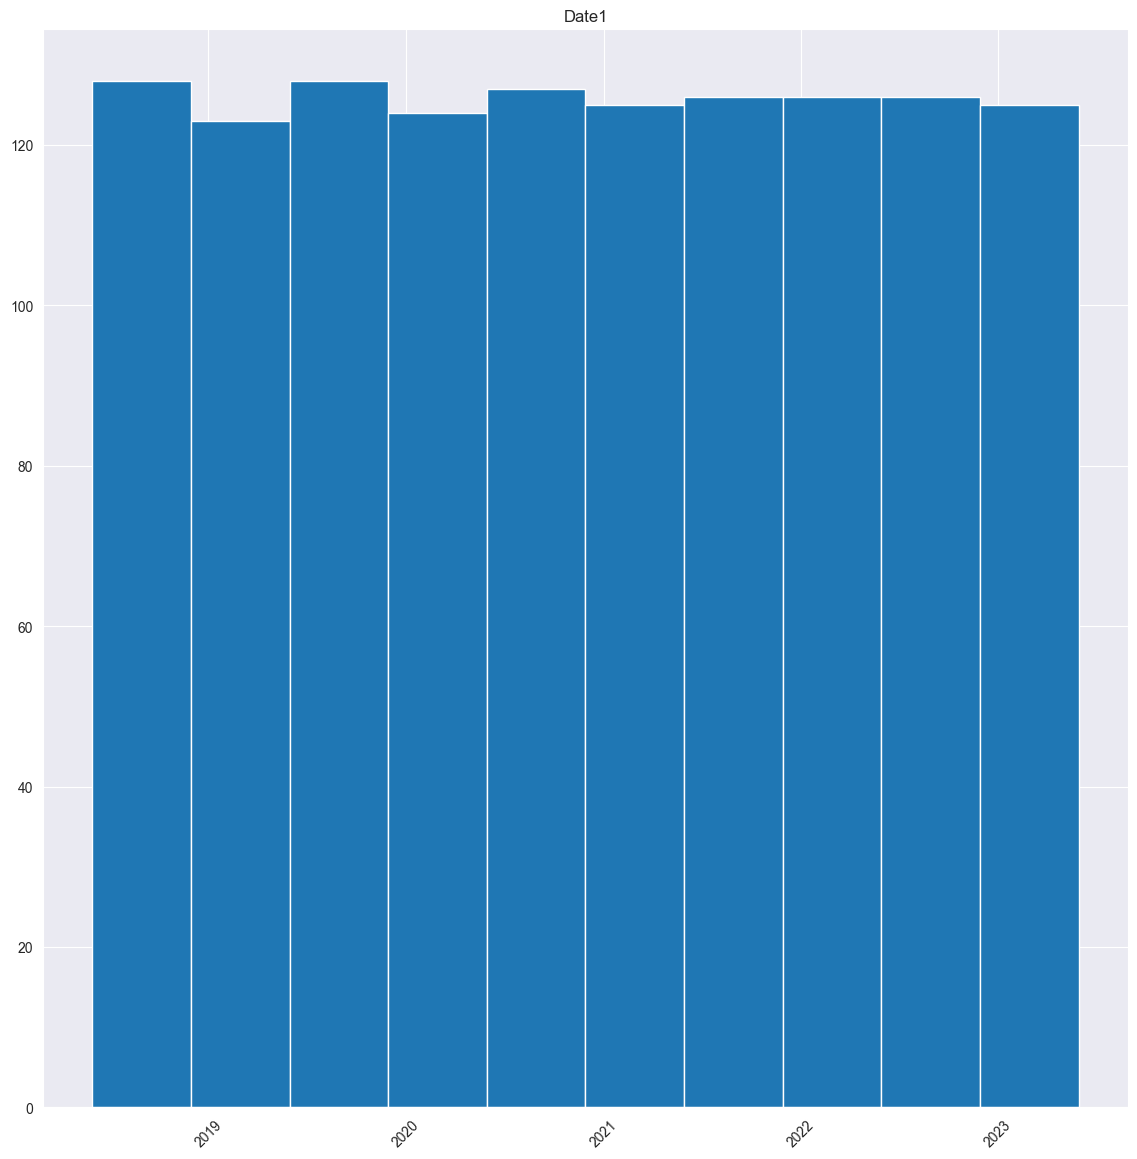

In [361]:
Consumer_Staples1.hist(figsize=(14,14), xrot=45)
plt.show()

In [362]:
Com_Serv=Communication_Services.drop(["Unnamed: 0"],axis=1)

In [363]:
Com_Serv

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 30, 2023",210.92,212.64,209.39,210.77,210.77,"290,422,500"
1,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400"
2,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700"
3,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100"
4,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700"
...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",145.81,148.31,145.40,148.01,148.01,-
1254,"Jun 05, 2018",145.08,145.99,144.81,145.81,145.81,-
1255,"Jun 04, 2018",145.23,146.14,144.93,145.08,145.08,-
1256,"Jun 01, 2018",144.87,145.73,144.71,145.23,145.23,-


In [364]:
Com_Serv['Date1'] = pd.to_datetime(Com_Serv.Date)

In [365]:
Com_Serv

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,"May 30, 2023",210.92,212.64,209.39,210.77,210.77,"290,422,500",2023-05-30
1,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400",2023-05-26
2,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700",2023-05-25
3,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100",2023-05-24
4,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700",2023-05-23
...,...,...,...,...,...,...,...,...
1253,"Jun 06, 2018",145.81,148.31,145.40,148.01,148.01,-,2018-06-06
1254,"Jun 05, 2018",145.08,145.99,144.81,145.81,145.81,-,2018-06-05
1255,"Jun 04, 2018",145.23,146.14,144.93,145.08,145.08,-,2018-06-04
1256,"Jun 01, 2018",144.87,145.73,144.71,145.23,145.23,-,2018-06-01


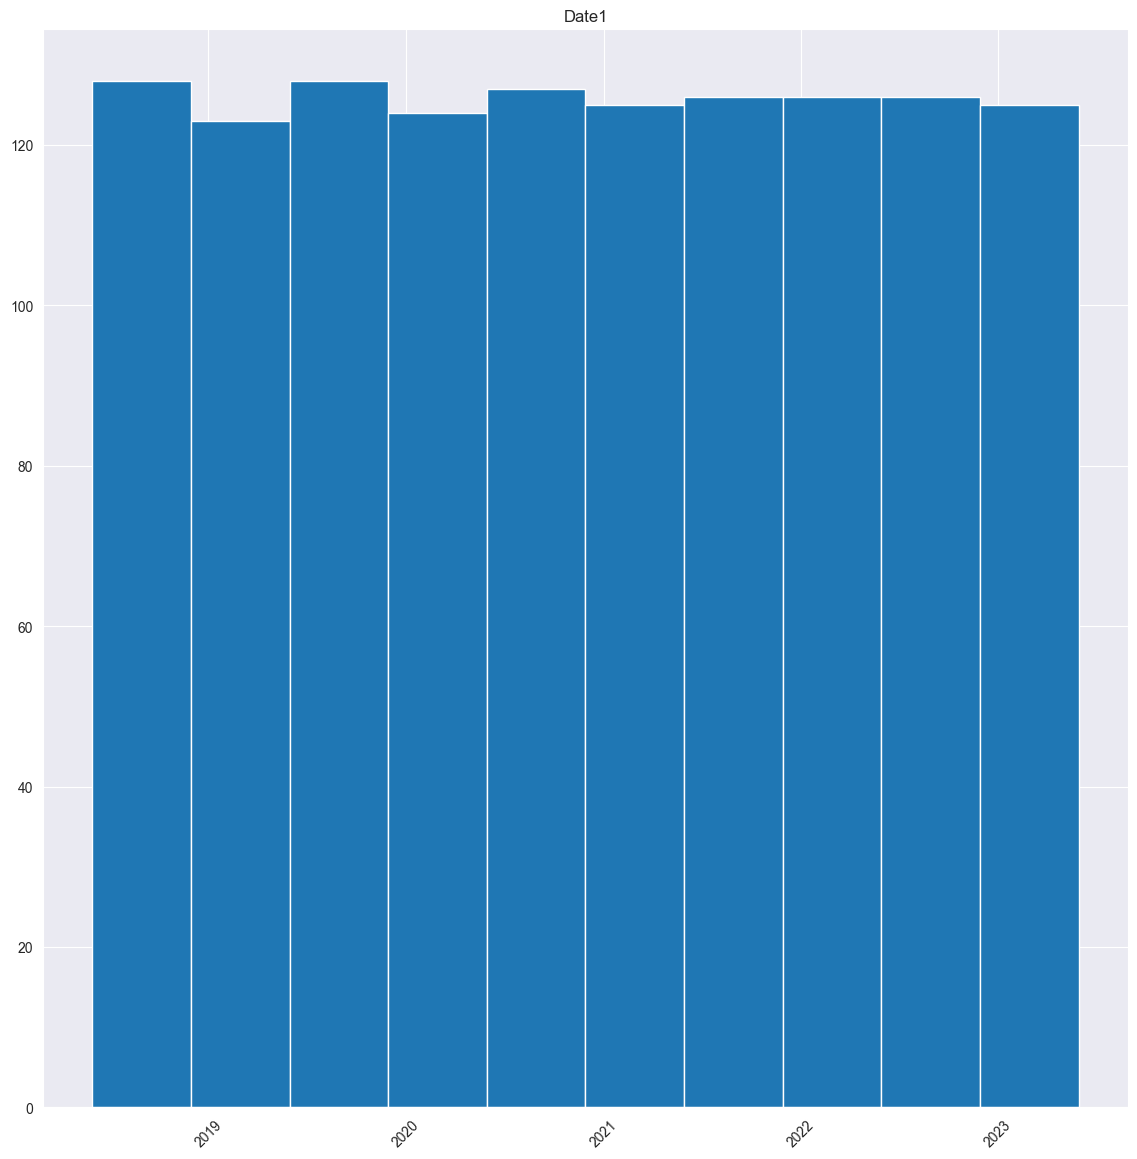

In [366]:
Com_Serv.hist(figsize=(14,14), xrot=45)
plt.show()

In [367]:
Industrials1.describe()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9132\39680592.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Industrials1.describe()


,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
count,1258,1258,1258,1258,1258,1258,1258,1258
unique,1258,1224,1209,1228,1221,1221,985,1258
top,"May 30, 2023",658.41,-,-,-,-,-,2023-05-30 00:00:00
freq,1,3,3,3,3,3,274,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-30 00:00:00


In [368]:
Energy1.describe()

,Open,High,Low,Close*,Adj Close**
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,460.451121,466.387973,454.512361,460.501963,460.501963
std,126.962312,127.857766,125.881577,126.991902,126.991902
min,179.940000,193.260000,172.450000,179.940000,179.940000
25%,371.645000,377.192500,368.320000,371.645000,371.645000
50%,453.375000,457.115000,450.565000,453.375000,453.375000
75%,558.555000,565.025000,553.612500,558.555000,558.555000
max,720.160000,724.740000,711.960000,720.160000,720.160000


In [369]:
Consumer_Staples1.describe()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9132\307921548.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Consumer_Staples1.describe()


,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
count,1258,1258,1258,1258,1258,1258,1258,1258
unique,1258,1234,1222,1226,1231,1231,984,1258
top,"May 30, 2023",-,738.15,754.59,-,-,-,2023-05-30 00:00:00
freq,1,3,3,3,3,3,274,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-30 00:00:00


In [370]:
Com_Serv.describe()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9132\1193570539.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Com_Serv.describe()


,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
count,1258,1258,1258,1258,1258,1258,1258,1258
unique,1258,1186,1186,1184,1189,1189,985,1258
top,"May 30, 2023",166.12,146.99,166.00,158.75,158.75,-,2023-05-30 00:00:00
freq,1,4,3,3,3,3,274,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-30 00:00:00


In [371]:
Com_Serv.describe(datetime_is_numeric=True)

,Date1
count,1258
mean,2020-11-27 21:02:34.531001600
min,2018-05-31 00:00:00
25%,2019-08-29 06:00:00
50%,2020-11-26 00:00:00
75%,2022-02-27 06:00:00
max,2023-05-30 00:00:00


In [372]:
Consumer_Staples1.describe(datetime_is_numeric=True)

,Date1
count,1258
mean,2020-11-27 21:02:34.531001600
min,2018-05-31 00:00:00
25%,2019-08-29 06:00:00
50%,2020-11-26 00:00:00
75%,2022-02-27 06:00:00
max,2023-05-30 00:00:00


In [373]:
Industrials1.describe(datetime_is_numeric=True)

,Date1
count,1258
mean,2020-11-27 21:02:34.531001600
min,2018-05-31 00:00:00
25%,2019-08-29 06:00:00
50%,2020-11-26 00:00:00
75%,2022-02-27 06:00:00
max,2023-05-30 00:00:00


In [374]:
Industrials1.describe(include='object')

,Date,Open,High,Low,Close*,Adj Close**,Volume
count,1258,1258,1258,1258,1258,1258,1258
unique,1258,1224,1209,1228,1221,1221,985
top,"May 30, 2023",658.41,-,-,-,-,-
freq,1,3,3,3,3,3,274


In [375]:
Energy1.describe(include='object')

,Date,Volume
count,1258,1258
unique,1258,988
top,"May 30, 2023",-
freq,1,271


In [376]:
Consumer_Staples1.describe(include='object')

,Date,Open,High,Low,Close*,Adj Close**,Volume
count,1258,1258,1258,1258,1258,1258,1258
unique,1258,1234,1222,1226,1231,1231,984
top,"May 30, 2023",-,738.15,754.59,-,-,-
freq,1,3,3,3,3,3,274


In [377]:
Com_Serv.describe(include='object')

,Date,Open,High,Low,Close*,Adj Close**,Volume
count,1258,1258,1258,1258,1258,1258,1258
unique,1258,1186,1186,1184,1189,1189,985
top,"May 30, 2023",166.12,146.99,166.00,158.75,158.75,-
freq,1,4,3,3,3,3,274
